In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

In [3]:
df = pd.read_csv("C:/Users/91700/Downloads/US_IR_cleaned.csv")
mat = df.columns
df = df.dropna()
new_head  = df.columns +"Yr"
df.columns = new_head
df = df.rename(columns = {"MaturityYr":"Maturity"})
df = df.set_index('Maturity')
df.head()

,0.25Yr,0.5Yr,0.75Yr,1Yr,2Yr,3Yr,4Yr,5Yr,6Yr,7Yr,8Yr,9Yr,10Yr,12Yr,15Yr,20Yr,25Yr
Maturity,,,,,,,,,,,,,,,,,
01-01-2018,1.6943,1.7535,1.8274,1.8992,2.0780,2.1690,2.2140,2.2450,2.2785,2.3106,2.3412,2.3700,2.3980,2.4445,2.4897,2.5331,2.5385
02-01-2018,1.6969,1.7720,1.8506,1.9244,2.1071,2.1993,2.2479,2.2826,2.3189,2.3523,2.3840,2.4145,2.4440,2.4925,2.5425,2.5910,2.6035
03-01-2018,1.6959,1.7720,1.8543,1.9311,2.1106,2.2017,2.2508,2.2852,2.3182,2.3483,2.3776,2.4064,2.4330,2.4808,2.5286,2.5739,2.5862
04-01-2018,1.7038,1.7930,1.8772,1.9537,2.1407,2.2330,2.2804,2.3131,2.3430,2.3706,2.3958,2.4210,2.4460,2.4903,2.5351,2.5770,2.5883
05-01-2018,1.7039,1.7915,1.8778,1.9575,2.1489,2.2452,2.2964,2.3324,2.3628,2.3915,2.4195,2.4448,2.4701,2.5155,2.5600,2.6034,2.6144


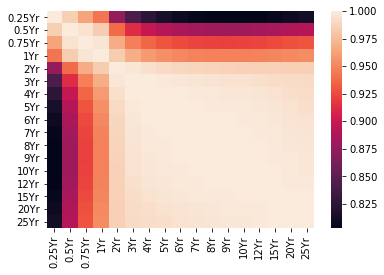

In [4]:
cormat = df.corr()
sn.heatmap(cormat, fmt='g')
plt.show()

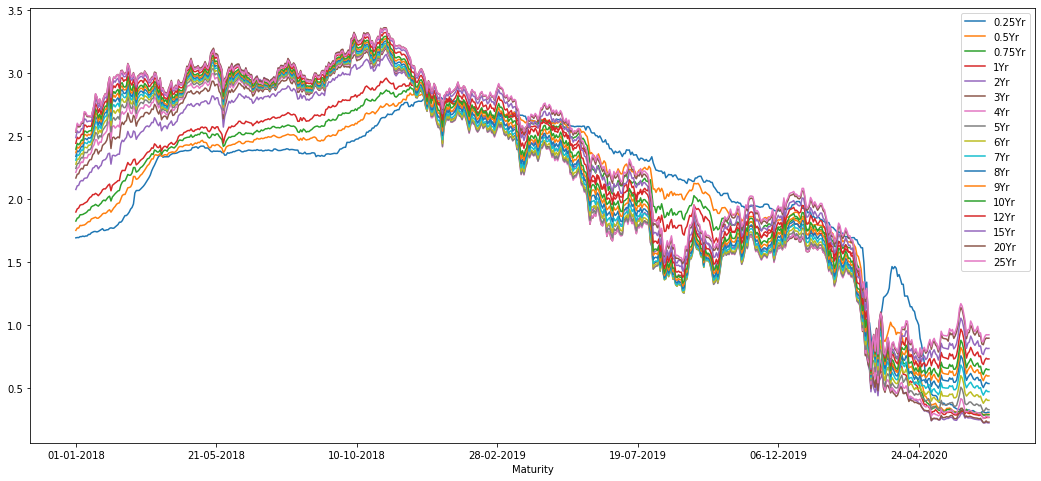

In [5]:
plt.figure(figsize = (18,8))
for i in range(len(new_head)-1):
    df.iloc[:,i].plot()
    plt.legend()
plt.show()

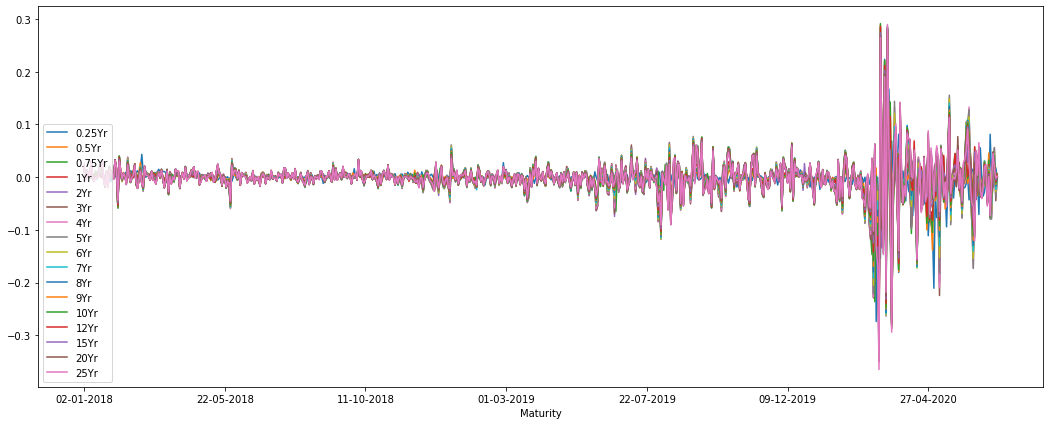

In [6]:
dates = list(df.index)
log_data = np.log(df)
ret_data =log_data.diff()
ret_data = ret_data.dropna()
ret_data.plot(figsize=(18,7))
plt.legend(loc = 'lower left')

In [7]:
# For looking at dates of high volatility
date_vol = np.argmax(ret_data['25Yr'])
dates[date_vol]

'16-03-2020'

In [8]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
x_raw = df.values
scaler = StandardScaler()
x = scaler.fit_transform(x_raw)

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

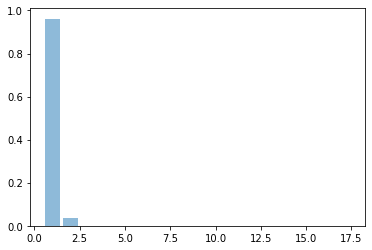

In [10]:
explained_var = pca.explained_variance_ratio_
pc = pca.components_
eig_val_proxy = pca.explained_variance_
plt.bar(range(1,pca.n_components_+1), explained_var, alpha = 0.5, align = 'center')
plt.show()

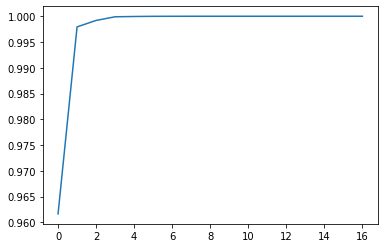

In [11]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [12]:
# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cormat)
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,18))
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
df_eigval.style.format({"Explained proportion": "{:.1%}"})

,Eigenvalues,Explained proportion
1,16.347716,96.2%
2,0.617123,3.6%
3,0.021346,0.1%
4,0.012035,0.1%
5,0.000966,0.0%
6,0.000576,0.0%
7,0.000133,0.0%
8,0.000071,0.0%
9,0.000011,0.0%
10,0.000008,0.0%


In [13]:
matu = []
mat1 = mat[1:]
for i in mat1:
    matu.append(i)
matu = list(map(float, matu))

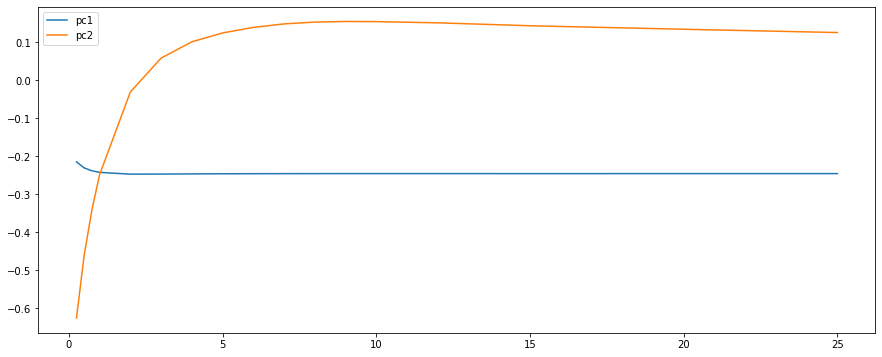

In [14]:
plt.figure(figsize = (15,6))
listlab = ['pc1', 'pc2']
for i in range(2):
    plt.plot(matu, pca.components_[i])
plt.legend(listlab)
plt.show()

In [15]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc_maj = pd.DataFrame(pc1, matu)
pd.DataFrame.insert(pc_maj, loc = 0, column = 'pc2', value = pc2)
pc_maj.columns = {'pc1', 'pc2'}

In [16]:
pc_maj

,pc1,pc2
0.25,-0.625031,-0.214664
0.50,-0.460055,-0.230497
0.75,-0.341449,-0.238022
1.00,-0.248798,-0.242243
2.00,-0.031170,-0.246899
3.00,0.058107,-0.246719
4.00,0.100936,-0.246242
5.00,0.124363,-0.245920
6.00,0.138878,-0.245716
7.00,0.148106,-0.245574


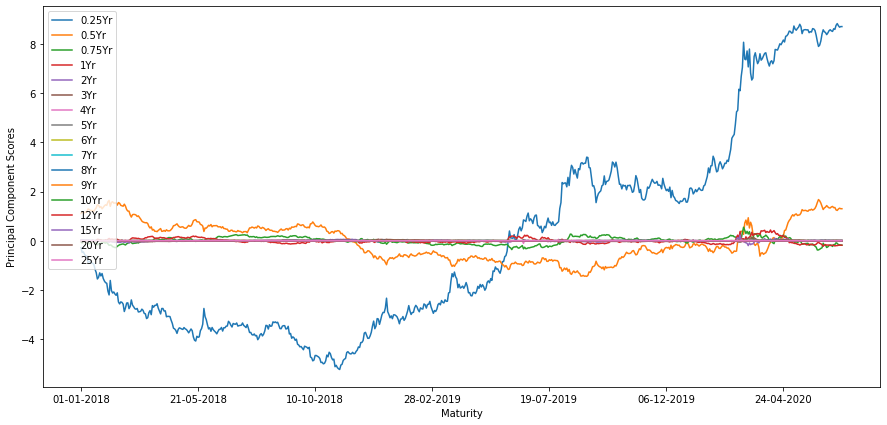

In [17]:
scores = pd.DataFrame(np.dot(eigenvectors.T, x.T).T, index=df.index, columns=df.columns)
scores.plot(figsize=(15,7))
plt.ylabel("Principal Component Scores")
plt.legend(loc='upper left')
plt.show()

In [18]:
loadings = pca.components_[0].T*np.sqrt(pca.explained_variance_)

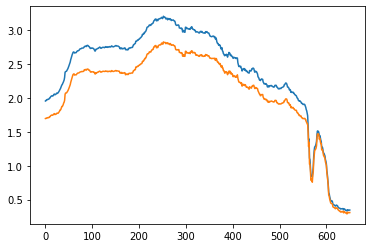

In [19]:
plt.plot(np.dot(x_raw,loadings*-1))
plt.plot(x_raw[:,0])
plt.show()

In [20]:
# For the data post Covid-19
subset = df[550:].values
scaler = StandardScaler()
x_sub = scaler.fit_transform(subset)
pca_sub = PCA()
pca_sub.fit(x_sub)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

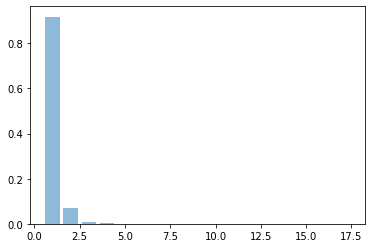

In [21]:
plt.bar(range(1,pca_sub.n_components_+1), pca_sub.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.show()

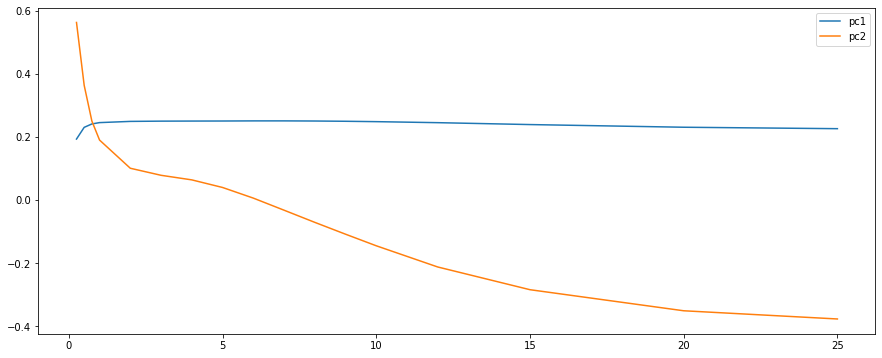

In [22]:
plt.figure(figsize = (15,6))
listlab = ['pc1', 'pc2']
for i in range(2):
    plt.plot(matu, pca_sub.components_[i])
plt.legend(listlab)
plt.show()

In [23]:
# For Yield Curve Forecasting (inputs)
# Inputs for expectation
n_views = 1
n_swaps = 17
V = np.zeros((n_views, n_swaps), float)
V[0][0] = 1
y_t = df.values[1]
y_t = y_t.reshape(-1,1)
Q_t = np.dot(V, y_t)
Q_t1 = Q_t - 0.0010
delta_Q = Q_t1-Q_t

In [24]:
new_data = df.diff()
fc_data = new_data
C = fc_data.corr()
stdev = fc_data.std()
D = np.zeros((n_swaps, n_swaps), float)
np.fill_diagonal(D, stdev)
S = np.dot(D, C)
S = np.dot(S, D)

In [25]:
lam, W = np.linalg.eig(C)
lamb = np.zeros((n_swaps, n_swaps), float)
np.fill_diagonal(lamb, lam)
W_dash = W[:,:n_views]
W_hat = W[:,n_views:]
lamb_hat = lamb[n_views:,n_views:]

In [26]:
temp = np.dot(np.dot(V,D),W_dash)
temp = np.linalg.inv(temp)
A = np.dot(W_dash, temp)

In [27]:
iden = np.identity(n_swaps, dtype = float)
temp_b = np.dot(np.dot(A,V), D)
B = np.dot((iden - temp_b), W_hat)

In [28]:
mu = fc_data.mean().values
mu = mu.reshape(-1,1)
y_t1 = y_t + mu + np.dot(np.dot(D, A),(delta_Q - np.dot(V, mu)))

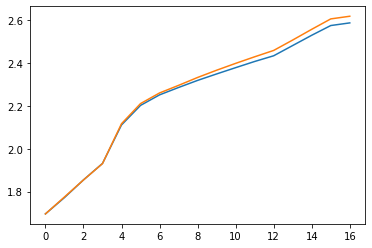

In [29]:
plt.plot(df.values[2])
plt.plot(y_t1)
plt.show()